In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import time
import gc

from datetime import datetime

sns.set(style='whitegrid')

pd.set_option('display.max_columns', None)  

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Resume

This notebook contains the modeling using a Deep Learning approach.

In [2]:
# To force some binary varibles to be read as str
dtypes = \
{
    'projectid': str,
    'teacher_acctid': str, 
    'month': str,
    'school_metro': str,                                          
    'school_charter': str,                                
    'teacher_prefix': str,                                        
    'teacher_teach_for_america': str,                                                                                             
    'eligible_double_your_impact_match': str,                      
    'eligible_almost_home_match': str,                                                                                                                                                      
}

In [3]:
df = pd.read_csv('../Data/Kaggle/KDDCup14/feature_selection.csv', dtype=dtypes)

In [4]:
df.head()

,projectid,teacher_acctid,school_latitude,school_longitude,school_metro,school_charter,teacher_prefix,teacher_teach_for_america,primary_focus_subject,resource_type,fulfillment_labor_materials,total_price_excluding_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted,qtd_projects,is_exciting,mean_is_exciting,mean_at_least_1_teacher_referred_donor,mean_fully_funded,mean_at_least_1_green_donation,mean_great_chat,mean_donation_from_thoughtful_donor,mean_three_or_more_non_teacher_referred_donors,short_description,title_len,essay_len,unique_vendors,unique_items,qtd_items,mean_price,project_resource_type_Other,project_resource_type_Supplies,project_resource_type_Technology,project_resource_type_Trips,project_resource_type_Visitors,mean_donation_to_projects,mean_donation_to_project,dollar_amount_100_and_up,dollar_amount_10_to_100,dollar_amount_under_10,payment_method_almost_home_match,payment_method_amazon,payment_method_check,payment_method_creditcard,payment_method_double_your_impact_match,payment_method_no_cash_received,payment_method_paypal,payment_method_promo_code_match,donation_included_optional_support_f,payment_included_acct_credit_t,payment_included_web_purchased_gift_card_t,for_honoree_t,is_teacher_acct_t,month
0,316ed8fb3b81402ff6ac8f721bb31192,42d43fa6f37314365d08692e08680973,36.576340,-119.608713,NaN,0,Mrs.,0,Literature & Writing,Books,30.0,555.81,32.0,0,0,2014-05-12,3.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,Can we read one more chapter? Do we have to go...,28.0,2274.0,2.0,3.0,99.0,158.40000,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,0,0.0,0.0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0,0.0,5
1,90de744e368a7e4883223ca49318ae30,864eb466462bf704bf7a16a585ef296a,32.911179,-96.723640,urban,0,Mrs.,0,Literacy,Books,30.0,296.47,22.0,0,0,2014-05-12,63.0,NaN,0.142857,0.428571,0.857143,1.000000,0.571429,0.0000,0.571429,Engaging reading materials sent right to my st...,35.0,1290.0,2.0,8.0,50.0,30.72125,0.0,0.0,0.0,0.0,0.0,65.950294,NaN,0,0.0,0.0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0,0.0,5
2,32943bb1063267de6ed19fc0ceb4b9a7,37f85135259ece793213aca9d8765542,45.166039,-122.414576,rural,0,Mr.,0,Literacy,Technology,30.0,430.89,17.0,0,0,2014-05-11,1.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,Our second grade in rural Oregon is an adventu...,29.0,1263.0,1.0,1.0,1.0,379.99000,0.0,0.0,1.0,0.0,0.0,0.000000,NaN,0,0.0,0.0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0,0.0,5
3,bb18f409abda2f264d5acda8cab577a9,2133fc46f951f1e7d60645b0f9e48a6c,40.641727,-73.965655,urban,0,Mr.,1,Social Sciences,Books,30.0,576.07,12.0,0,0,2014-05-11,572.0,NaN,0.166667,0.200000,0.700000,0.888889,0.818182,0.2000,0.444444,Help give 12 Brooklyn students access and orga...,52.0,1705.0,1.0,2.0,2.0,269.00000,0.0,0.0,0.0,0.0,0.0,109.136481,NaN,0,0.0,0.0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0,0.0,5
4,24761b686e18e5eace634607acbcc19f,867ff478a63f5457eaf41049536c47cd,34.043939,-118.288371,urban,0,Ms.,0,Mathematics,Other,30.0,408.40,24.0,0,0,2014-05-11,453.0,NaN,0.060606,0.281250,0.909091,0.878788,0.151515,0.0625,0.848485,Technology is changing the world as we speak. ...,16.0,2385.0,1.0,2.0,2.0,170.99000,2.0,0.0,0.0,0.0,0.0,72.897191,NaN,0,0.0,0.0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0,0.0,5


In [5]:
categorical = list(df.select_dtypes(include=[object]).columns)

In [6]:
categorical

['projectid',
 'teacher_acctid',
 'school_metro',
 'school_charter',
 'teacher_prefix',
 'teacher_teach_for_america',
 'primary_focus_subject',
 'resource_type',
 'eligible_double_your_impact_match',
 'eligible_almost_home_match',
 'date_posted',
 'short_description',
 'month']

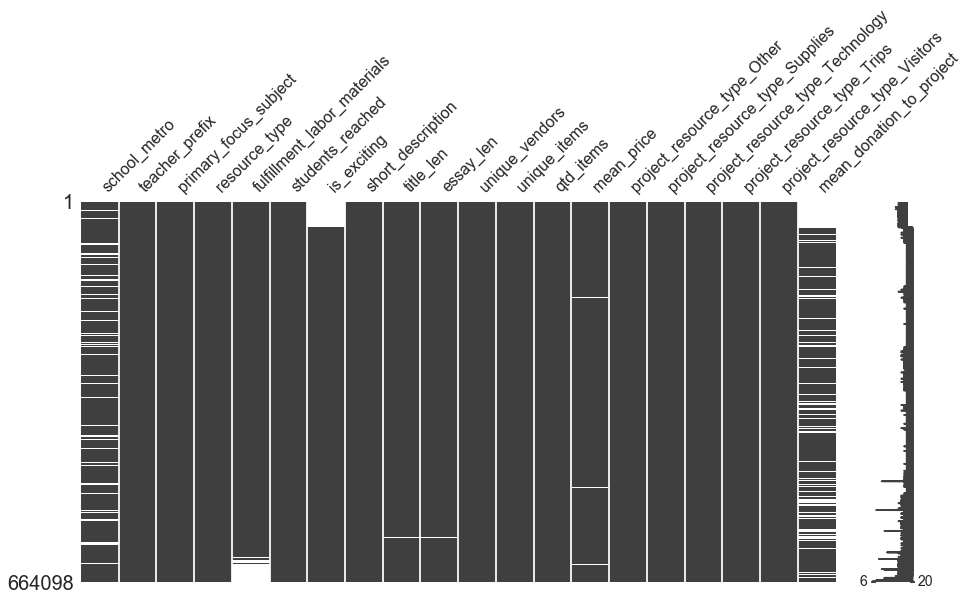

In [7]:
missing_columns = df.columns[df.isnull().any()].tolist()
msno.matrix(df[missing_columns], figsize=(15, 7))

In [8]:
# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder

categorical = list(df.select_dtypes(include=[object]).columns)
exclude = ['projectid', 'teacher_acctid', 'short_description', 'date_posted']

to_consider = [cat for cat in categorical if not cat in exclude]

le = LabelEncoder()
for cat in to_consider:
        print(cat)
        df[cat] = le.fit_transform(df[cat].astype(str))
        print(le.classes_)
        print(le.transform(le.classes_))

school_metro
['nan' 'rural' 'suburban' 'urban']
[0 1 2 3]
school_charter
['0' '1']
[0 1]
teacher_prefix
['Dr.' 'Mr.' 'Mr. & Mrs.' 'Mrs.' 'Ms.' 'nan']
[0 1 2 3 4 5]
teacher_teach_for_america
['0' '1']
[0 1]
primary_focus_subject
['Applied Sciences' 'Character Education' 'Civics & Government'
 'College & Career Prep' 'Community Service' 'ESL' 'Early Development'
 'Economics' 'Environmental Science' 'Extracurricular' 'Foreign Languages'
 'Gym & Fitness' 'Health & Life Science' 'Health & Wellness'
 'History & Geography' 'Literacy' 'Literature & Writing' 'Mathematics'
 'Music' 'Nutrition' 'Other' 'Parent Involvement' 'Performing Arts'
 'Social Sciences' 'Special Needs' 'Sports' 'Visual Arts' 'nan']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]
resource_type
['Books' 'Other' 'Supplies' 'Technology' 'Trips' 'Visitors' 'nan']
[0 1 2 3 4 5 6]
eligible_double_your_impact_match
['0' '1']
[0 1]
eligible_almost_home_match
['0' '1']
[0 1]
month
['1' '10' '11'

In [9]:
for c in categorical:
    df[c] = df[c].astype('category')

In [10]:
# Filling nas for numerical variables
numerical = list(df.select_dtypes(include=[np.number]).drop('is_exciting', axis=1).columns)
df.loc[:, numerical].fillna(0, inplace=True)

In [11]:
# Getting dummies for binary features
df = pd.get_dummies(df, columns=['school_metro', 'school_charter', 'teacher_teach_for_america', 
                                 'eligible_double_your_impact_match', 'eligible_almost_home_match'])

In [12]:
# Dropping unecessary features, since for binary featuers one column is sufficient
df.drop(['school_metro_0', 
         'school_charter_0',
         'teacher_teach_for_america_0',
         'eligible_double_your_impact_match_0',
         'eligible_almost_home_match_0'], axis=1, inplace=True)

In [13]:
# Sppliting in train & validation
df['date_posted'] = pd.to_datetime(df['date_posted'])
df_train = df[(df['date_posted'].dt.year > 2009) & (df['date_posted'].dt.year < 2014)].copy()
df_test = df[df['date_posted'].dt.year >= 2014].copy()

In [14]:
df_train.shape

(439599, 58)

In [15]:
df_test.shape

(44772, 58)

In [16]:
del df
gc.collect()

12180

### Modeling

In [17]:
from sklearn.externals import joblib
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [18]:
df_ids = df_test['projectid'].copy()

In [19]:
df_train.drop(['date_posted', 'projectid', 'teacher_acctid'], axis=1, inplace=True)
df_test.drop(['date_posted', 'projectid', 'teacher_acctid'], axis=1, inplace=True)

In [20]:
X = df_train.drop(['is_exciting'], axis=1).copy()
y = df_train['is_exciting']

In [21]:
categorical = list(X.select_dtypes(include=['category']))
categorical

['teacher_prefix',
 'primary_focus_subject',
 'resource_type',
 'short_description',
 'month']

#### Embeddings Helper

In [22]:
from tqdm import tqdm

In [23]:
# load the vectors in a dictionary:
import gensim.models.keyedvectors as word2vec

def load_embeddings(path, embedding, split=" ", encoding='utf8'):
    embeddings_index = {}
    
    if(embedding=="glove" or embedding=="fasttext" ):
        f = open(path, encoding=encoding)
        for line in tqdm(f):
            print(line)
            break
            values = line.split(split)
            word = values[0]
            try:
                coefs = np.asarray(values[1:], dtype='float32')
            except:
                continue
            embeddings_index[word] = coefs
        f.close() 
    else:
        word2vecDict = word2vec.KeyedVectors.load_word2vec_format(path, binary=True)
        for word in tqdm(word2vecDict.wv.vocab):
            embeddings_index[word] = word2vecDict.word_vec(word)
               
    print('Found %s word vectors.' % len(embeddings_index))

    return embeddings_index

C:\Users\paula.ceccon.ribeiro\AppData\Local\Continuum\Anaconda3\lib\site-packages\gensim\utils.py:865: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
Using TensorFlow backend.


In [24]:
# This function creates a normalized vector for the whole sentence
def sent2vec(s, embeddings_index):
    words = str(s).lower()
    words = word_tokenize(words)
    words = [w for w in words if not w in stop_words]
    words = [w for w in words if w.isalpha()]
    M = []
    for w in words:
        try:
            M.append(embeddings_index[w])
        except:
            continue
    M = np.array(M)
    v = M.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(300)
    return v / np.sqrt((v ** 2).sum())

In [25]:
def embedding_matrix(embeddings_index):
    word_index = tokenizer.word_index

    # create an embedding matrix for the words we have in the dataset
    embedding_matrix = np.zeros((len(word_index) + 1, 300))
    for word, i in tqdm(word_index.items()):
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
            
    return embedding_matrix

#### Deep Learning 

In [26]:
from keras.models import Model, Sequential
from keras.layers import Dense, Embedding, Input, Activation
from keras.layers import Flatten, Dropout, GlobalMaxPooling1D, GlobalAveragePooling1D, SpatialDropout1D, GRU, LSTM, Conv1D, Bidirectional
from keras.layers import concatenate
from keras.preprocessing import text, sequence
from keras.callbacks import EarlyStopping, Callback
import keras.backend as K

In [27]:
# Definition of the metric used in Kaggle

import tensorflow as tf

def tf_roc_auc(y_true, y_pred):
    score, up_opt = tf.metrics.auc(y_true, y_pred)
    K.get_session().run(tf.local_variables_initializer())
    with tf.control_dependencies([up_opt]):
        score = tf.identity(score)
    return score

In [28]:
from IPython.display import clear_output

class PlotLosses(Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.tf_roc_acu = []
        self.val_tf_roc_auc = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.tf_roc_acu.append(logs.get('tf_roc_acu'))
        self.val_tf_roc_auc.append(logs.get('val_tf_roc_auc'))
        self.i += 1
        
        clear_output(wait=True)
        plt.figure(figsize=(10, 5))
        plt.plot(self.x, self.losses, label='loss')
        plt.plot(self.x, self.val_losses, label='val_loss')
        plt.plot(self.x, self.tf_roc_acu, label='tf_roc_acu')
        plt.plot(self.x, self.val_tf_roc_auc, label='val_tf_roc_auc')
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

In [29]:
def get_keras_data(text, dataset):
    X = {
        # Categorical
        'teacher_prefix' : np.array(dataset['teacher_prefix']),
        'primary_focus_subject' : np.array(dataset['primary_focus_subject']),
        'resource_type' : np.array(dataset['resource_type']),
        'month' : np.array(dataset['month']),
        'short_description' : np.array(text),       

        # Numerical
        'numerical' : np.array(dataset[dataset.columns.difference(categorical)])
    }
    return X

In [30]:
for c in categorical:
    print(c, X[c].nunique())

teacher_prefix 4
primary_focus_subject 28
resource_type 7
short_description 423105
month 12


In [31]:
def get_model(X, embedding_matrix, seq_len, dr_r):
    dr_r = 0.2
    
    # Inputs
    teacher_prefix        = Input(shape=[1], name='teacher_prefix')
    primary_focus_subject = Input(shape=[1], name='primary_focus_subject')
    resource_type         = Input(shape=[1], name='resource_type')
    month                 = Input(shape=[1], name='month')
    short_description     = Input(shape=(seq_len,), name='short_description')
    numerical             = Input(shape=[X['numerical'].shape[1]], name='numerical')
    
    
    # Embeddings layers
    emb_teacher_prefix         = Embedding(4, 2, name='emb_teacher_prefix') (teacher_prefix)
    emb_primary_focus_subject  = Embedding(28, 7, name='emb_primary_focus_subject') (primary_focus_subject)
    emb_resource_type          = Embedding(7, 2, name='emb_resource_type') (resource_type)
    emb_month                  = Embedding(12, 6, name='emb_month') (month)
    emb_short_description      = Embedding(embedding_matrix.shape[0], embedding_matrix.shape[1], weights=[embedding_matrix], \
                                           trainable=True, name='emb_short_description')(short_description)
    
    rnn_layer = LSTM(16) (emb_short_description)

    #main layer
    main_l = concatenate([
        rnn_layer,
        Flatten() (emb_teacher_prefix),
        Flatten() (emb_primary_focus_subject),
        Flatten() (emb_resource_type),
        Flatten() (emb_month),
        numerical
    ])
    
    main_l = Dropout(dr_r) (Dense(256, activation='relu') (main_l))
    main_l = Dropout(dr_r) (Dense(128, activation='relu') (main_l))
    main_l = Dropout(dr_r) (Dense(64,  activation='relu') (main_l))
    main_l = Dropout(dr_r) (Dense(32, activation='relu') (main_l))
    
    # Output
    output = Dense(1, activation='sigmoid') (main_l)
    
    # Model
    model = Model([teacher_prefix, primary_focus_subject, resource_type, month, short_description, numerical], output)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf_roc_auc])
    
    return model

#### Training

In [32]:
categorical

['teacher_prefix',
 'primary_focus_subject',
 'resource_type',
 'short_description',
 'month']

In [33]:
# Scaling numerical features

from sklearn.preprocessing import StandardScaler, MinMaxScaler

to_scale = list(X.select_dtypes(exclude=['category', 'uint8']))

scaler = MinMaxScaler()
X.loc[:, to_scale] = X.loc[:, to_scale].fillna(0)
X.loc[:, to_scale] = scaler.fit_transform(X[to_scale])

In [34]:
X.head()

,school_latitude,school_longitude,teacher_prefix,primary_focus_subject,resource_type,fulfillment_labor_materials,total_price_excluding_optional_support,students_reached,qtd_projects,mean_is_exciting,mean_at_least_1_teacher_referred_donor,mean_fully_funded,mean_at_least_1_green_donation,mean_great_chat,mean_donation_from_thoughtful_donor,mean_three_or_more_non_teacher_referred_donors,short_description,title_len,essay_len,unique_vendors,unique_items,qtd_items,mean_price,project_resource_type_Other,project_resource_type_Supplies,project_resource_type_Technology,project_resource_type_Trips,project_resource_type_Visitors,mean_donation_to_projects,mean_donation_to_project,dollar_amount_100_and_up,dollar_amount_10_to_100,dollar_amount_under_10,payment_method_almost_home_match,payment_method_amazon,payment_method_check,payment_method_creditcard,payment_method_double_your_impact_match,payment_method_no_cash_received,payment_method_paypal,payment_method_promo_code_match,donation_included_optional_support_f,payment_included_acct_credit_t,payment_included_web_purchased_gift_card_t,for_honoree_t,is_teacher_acct_t,month,school_metro_1,school_metro_2,school_metro_3,school_charter_1,teacher_teach_for_america_1,eligible_double_your_impact_match_1,eligible_almost_home_match_1
44772,0.484059,0.794917,3,24,1,0.807692,0.002916,0.000007,0.000508,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,"If they can't learn the way we teach, we teach...",0.253731,0.211679,0.0625,0.054608,0.001524,0.000273,0.069264,0.000000,0.000000,0.0,0.0,0.000000,0.000864,0.005650,0.017794,0.0,0.0,0.0,0.0,0.0,0.0,0.009901,0.000000,0.0,0.0,0.021429,0.029412,0.0,0.0,3,0,1,0,0,0,0,0
44773,0.515252,0.567603,3,17,2,0.807692,0.001405,0.000030,0.006098,0.000000,0.166667,0.600000,0.714286,0.222222,0.0,0.333333,"Which is bigger, three liters or three quarts?...",0.179104,0.175976,0.0625,0.010239,0.000286,0.000674,0.000000,0.020134,0.000000,0.0,0.0,0.002501,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,3,0,0,1,0,0,0,0
44774,0.502746,0.955339,3,8,3,0.807692,0.001776,0.000230,0.005759,0.000000,0.000000,0.611111,0.800000,0.222222,0.0,0.533333,Do you remember classrooms that used just book...,0.126866,0.364487,0.1250,0.010239,0.000381,0.000883,0.000000,0.000000,0.027523,0.0,0.0,0.001704,0.000298,0.000000,0.007117,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.024390,0.0,0.0,0.000000,0.000000,0.0,0.0,3,0,1,0,0,0,0,0
44775,0.392316,0.896630,4,15,1,0.807692,0.001402,0.000018,0.118394,0.041667,0.100000,0.615385,0.700000,0.333333,0.0,0.428571,My class was given the beautiful gift of books...,0.149254,0.161060,0.0625,0.006826,0.000571,0.001070,0.008658,0.000000,0.000000,0.0,0.0,0.001499,0.000496,0.000000,0.003559,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.012195,0.0,0.0,0.000000,0.000000,0.0,0.0,3,0,0,1,0,0,0,0
44776,0.483660,0.799908,1,8,2,0.807692,0.003410,0.000070,0.008130,0.500000,0.750000,0.666667,1.000000,1.000000,0.0,1.000000,Thinking back in school science was either rea...,0.179104,0.307363,0.0625,0.017065,0.000476,0.000928,0.000000,0.033557,0.000000,0.0,0.0,0.005180,0.002996,0.011299,0.000000,0.0,0.0,0.0,0.0,0.0,0.5,0.000000,0.012195,0.0,0.0,0.000000,0.000000,0.0,0.0,3,0,0,1,0,0,1,0


In [35]:
X['short_description'].str.len().mean()

206.25433657510095

In [36]:
X['short_description'].str.len().max()

695.0

In [37]:
X['short_description'].str.len().min()

1.0

In [38]:
max_features = 695
max_len = 206

In [39]:
# Dealing with free text
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X['short_description'].astype(str))

X_short_description = tokenizer.texts_to_sequences(X['short_description'].astype(str))
X_short_description = sequence.pad_sequences(X_short_description, maxlen=max_len)

In [40]:
X_short_description

array([[  0,   0,   0, ...,  18,   2,  37],
       [  0,   0,   0, ...,   1,   2,   7],
       [  0,   0,   0, ..., 179,  45,   1],
       ...,
       [  0,   0,   0, ...,   7,  21, 262],
       [  0,   0,   0, ...,   5,  23,  76],
       [  0,   0,   0, ..., 496,  70,  77]])

In [41]:
# X = get_keras_data(X_short_description, X)

In [42]:
word2vec_path = '../Resources/Embeddings/GoogleNews-vectors-negative300.bin'
word2vec_embeddings_index = load_embeddings(word2vec_path, embedding='word2vec', encoding='ISO-8859-1')

100%|████████████████████████████████████████████████████████████████████| 3000000/3000000 [00:03<00:00, 776348.16it/s]


Found 3000000 word vectors.


In [43]:
word2vec_embedding_matrix = embedding_matrix(word2vec_embeddings_index)

100%|████████████████████████████████████████████████████████████████████████| 49416/49416 [00:00<00:00, 441521.67it/s]


In [44]:
# model = get_model(word2vec_embedding_matrix, max_len, 0.3)
# model.summary()

In [45]:
# Dealing with unbalanced classes

from sklearn.utils import class_weight

cw = class_weight.compute_class_weight('balanced', np.unique(y), y)
cw = dict(enumerate(cw))

In [46]:
cw

{0: 0.5455584540655118, 1: 5.987455734132389}

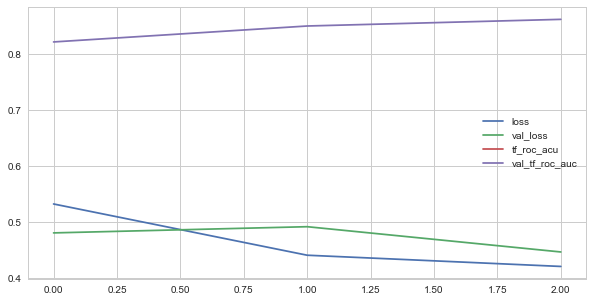

3
tf_roc_auc: 86.31%
85.37% (+/- 0.81%)


In [47]:
early_stopping = EarlyStopping(monitor='tf_roc_auc', patience=2)
BATCH_SIZE = 100
epochs = 10

#from sklearn.model_selection import StratifiedKFold
#cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

from sklearn.model_selection import TimeSeriesSplit
cv = TimeSeriesSplit(n_splits=3)

cvscores = []
i = 1
for train, test in cv.split(X, y):
    a = train
    X_a = get_keras_data(X_short_description[train], X.iloc[train])
    X_b = get_keras_data(X_short_description[test],  X.iloc[test])
    # create model
    model = get_model(X_a, word2vec_embedding_matrix, max_len, 0.3)
    # Fit the model
    model.fit(X_a, y.iloc[train], epochs=epochs, batch_size=BATCH_SIZE, validation_split=0.25, \
              verbose=2, callbacks=[plot_losses, early_stopping], class_weight=cw)
    # evaluate the model
    scores = model.evaluate(X_b, y.iloc[test], verbose=0)
    print(i)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    i += 1
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

In [74]:
cvscores

[84.3377594664205, 85.45819195898663, 86.31039455797834]

In [49]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

results_report = pd.DataFrame(columns=['ROC AUC', '% 1'])

for i, pa in enumerate(np.linspace(0.1, 0.9, 9)):
    y_pred = model.predict(X_b)
    y_pred = np.where(y_pred > pa, 1, 0)
    
    cf = confusion_matrix(y.iloc[test], y_pred)
    df_cm = pd.DataFrame(cf, index=['0', '1'], columns=['0', '1'])
        
    roc_auc = roc_auc_score(y.iloc[test], y_pred)
    results_report.loc[str(np.round(pa, 2))] = [roc_auc, y_pred.sum()/len(y_pred)]

In [50]:
results_report.round(decimals=2)

,ROC AUC,% 1
0.1,0.76,0.49
0.2,0.79,0.41
0.3,0.80,0.34
0.4,0.81,0.29
0.5,0.80,0.25
0.6,0.79,0.21
0.7,0.76,0.17
0.8,0.71,0.11
0.9,0.60,0.04


In [51]:
y_pred = model.predict(X_b).flatten()

In [52]:
y_test = y.iloc[test].reset_index(drop=True)

results_report = pd.DataFrame(columns=['Lower', 'Upper', '# 0', '# 1', '% 0', '% 1', 'KS'])
total_0 = len(y_test[y_test == 0])
total_1 = len(y_test[y_test == 1])
for i in np.linspace(0.0, 0.9, 10):
    subgroup = y_test[(y_pred >= i) & (y_pred < i+0.1)]
    count_0 = len(subgroup[subgroup == 0])
    count_1 = len(subgroup[subgroup == 1])
    cum_0 = (results_report.iloc[:int(i*10)]['# 0'].sum()+count_0)/total_0
    cum_1 = (results_report.iloc[:int(i*10)]['# 1'].sum()+count_1)/total_1
    results_report.loc[i] = [i, i+0.1, count_0, count_1, cum_0*100, cum_1*100, (cum_0-cum_1)*100]

In [53]:
results_report.reset_index(drop=True).round(decimals=2)

,Lower,Upper,# 0,# 1,% 0,% 1,KS
0,0.0,0.1,55840.0,143.0,54.44,1.95,52.49
1,0.1,0.2,9105.0,240.0,63.32,5.22,58.10
2,0.2,0.3,6624.0,309.0,69.78,9.44,60.34
3,0.3,0.4,5300.0,325.0,74.95,13.87,61.08
4,0.4,0.5,4042.0,356.0,78.89,18.72,60.17
5,0.5,0.6,3829.0,469.0,82.62,25.12,57.50
6,0.6,0.7,4440.0,688.0,86.95,34.50,52.45
7,0.7,0.8,5107.0,1105.0,91.93,49.56,42.37
8,0.8,0.9,5519.0,1982.0,97.31,76.59,20.72
9,0.9,1.0,2759.0,1717.0,100.00,100.00,0.00


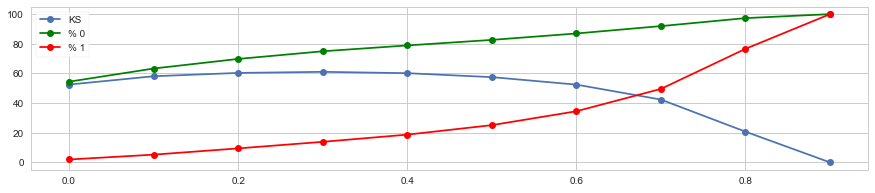

In [54]:
plt.figure(figsize=(15, 3))
plt.plot(results_report['KS'], 'o-')
plt.plot(results_report['% 0'], 'go-')
plt.plot(results_report['% 1'], 'ro-')
plt.legend(frameon=True);

#### Testing

In [55]:
X_ = df_test.drop(['is_exciting'], axis=1).copy()

In [56]:
X_.loc[:, to_scale] = X_.loc[:, to_scale].fillna(0)
X_.loc[:, to_scale] = scaler.transform(X_[to_scale])

In [57]:
X_.head()

,school_latitude,school_longitude,teacher_prefix,primary_focus_subject,resource_type,fulfillment_labor_materials,total_price_excluding_optional_support,students_reached,qtd_projects,mean_is_exciting,mean_at_least_1_teacher_referred_donor,mean_fully_funded,mean_at_least_1_green_donation,mean_great_chat,mean_donation_from_thoughtful_donor,mean_three_or_more_non_teacher_referred_donors,short_description,title_len,essay_len,unique_vendors,unique_items,qtd_items,mean_price,project_resource_type_Other,project_resource_type_Supplies,project_resource_type_Technology,project_resource_type_Trips,project_resource_type_Visitors,mean_donation_to_projects,mean_donation_to_project,dollar_amount_100_and_up,dollar_amount_10_to_100,dollar_amount_under_10,payment_method_almost_home_match,payment_method_amazon,payment_method_check,payment_method_creditcard,payment_method_double_your_impact_match,payment_method_no_cash_received,payment_method_paypal,payment_method_promo_code_match,donation_included_optional_support_f,payment_included_acct_credit_t,payment_included_web_purchased_gift_card_t,for_honoree_t,is_teacher_acct_t,month,school_metro_1,school_metro_2,school_metro_3,school_charter_1,teacher_teach_for_america_1,eligible_double_your_impact_match_1,eligible_almost_home_match_1
0,0.373956,0.495722,3,16,0,0.807692,0.003714,0.000032,0.000508,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,Can we read one more chapter? Do we have to go...,0.208955,0.360838,0.1250,0.010239,0.009429,0.001695,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,0,0,0,0,0,0,0
1,0.299170,0.713546,3,15,0,0.807692,0.001857,0.000022,0.010671,0.142857,0.428571,0.857143,1.000000,0.571429,0.0000,0.571429,Engaging reading materials sent right to my st...,0.261194,0.204697,0.1250,0.027304,0.004762,0.000329,0.000000,0.0,0.000000,0.0,0.0,0.001311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,0,0,1,0,0,0,0
2,0.549223,0.469016,1,15,3,0.807692,0.002820,0.000017,0.000169,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,Our second grade in rural Oregon is an adventu...,0.216418,0.200413,0.0625,0.003413,0.000095,0.004067,0.000000,0.0,0.009174,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,1,0,0,0,0,0,0
3,0.456907,0.930159,1,23,0,0.807692,0.003859,0.000012,0.096883,0.166667,0.200000,0.700000,0.888889,0.818182,0.2000,0.444444,Help give 12 Brooklyn students access and orga...,0.388060,0.270549,0.0625,0.006826,0.000190,0.002879,0.000000,0.0,0.000000,0.0,0.0,0.002170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,0,0,1,0,1,0,0
4,0.322284,0.508290,4,17,1,0.807692,0.002659,0.000024,0.076728,0.060606,0.281250,0.909091,0.878788,0.151515,0.0625,0.848485,Technology is changing the world as we speak. ...,0.119403,0.378451,0.0625,0.006826,0.000190,0.001830,0.008658,0.0,0.000000,0.0,0.0,0.001449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,0,0,1,0,0,0,0


In [58]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_['short_description'].astype(str))

X_short_description_ = tokenizer.texts_to_sequences(X_['short_description'].astype(str))
X_short_description_ = sequence.pad_sequences(X_short_description_, maxlen=max_len)

In [59]:
X_short_description_

array([[  0,   0,   0, ...,  58,   1,   2],
       [  0,   0,   0, ...,   5, 189, 294],
       [  0,   0,   0, ...,  25,  11,   6],
       ...,
       [  0,   0,   0, ..., 255,   7,   3],
       [  0,   0,   0, ...,  87,   2,  39],
       [  0,   0,   0, ..., 181,  76, 316]])

In [60]:
X_ = get_keras_data(X_short_description_, X_)

In [61]:
y_ = model.predict(X_)

In [62]:
y_.max()

0.33038813

In [63]:
df = pd.DataFrame({'projectid': df_ids, 'is_exciting': y_.flatten()})

In [64]:
out = pd.read_csv('../Data/Kaggle/KDDCup14/sampleSubmission.csv')

In [65]:
out.drop('is_exciting', axis=1, inplace=True)

In [66]:
out = out.merge(df)

In [67]:
out.to_csv('../Data/Kaggle/KDDCup14/submission_DL.csv', index=False)

Score: 0.55178

In [68]:
from keras.models import load_model

model.save('../Data/Kaggle/KDDCup14/DL.h5')  
del model

In [69]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [70]:
from keras.models import load_model
model = load_model('../Data/Kaggle/KDDCup14/DL.h5', custom_objects={'tf_roc_auc': tf_roc_auc})

In [71]:
from keras.utils.vis_utils import plot_model

In [72]:
import pydot

In [73]:
plot_model(model, to_file='../Data/Kaggle/KDDCup14/model_plot.png', show_shapes=True, show_layer_names=True)